In [1]:
pip install pandas numpy matplotlib seaborn yfinance


In [5]:
pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


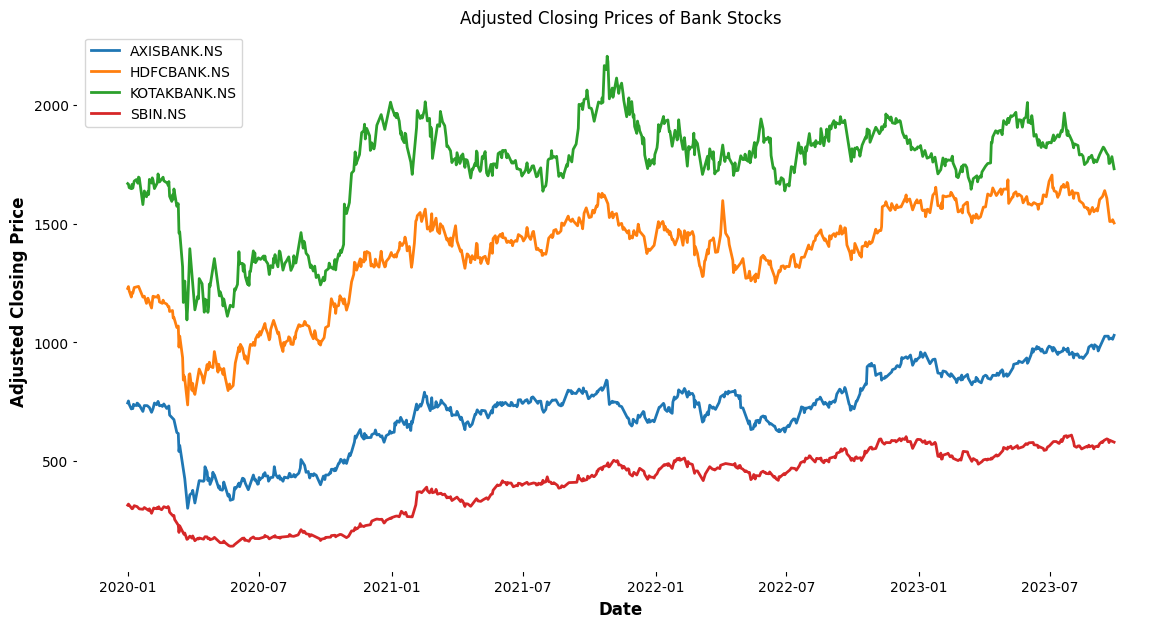

Correlation Matrix:
Ticker        AXISBANK.NS  HDFCBANK.NS  KOTAKBANK.NS   SBIN.NS
Ticker                                                        
AXISBANK.NS      1.000000     0.554955      0.533469  0.657592
HDFCBANK.NS      0.554955     1.000000      0.645271  0.554427
KOTAKBANK.NS     0.533469     0.645271      1.000000  0.491421
SBIN.NS          0.657592     0.554427      0.491421  1.000000


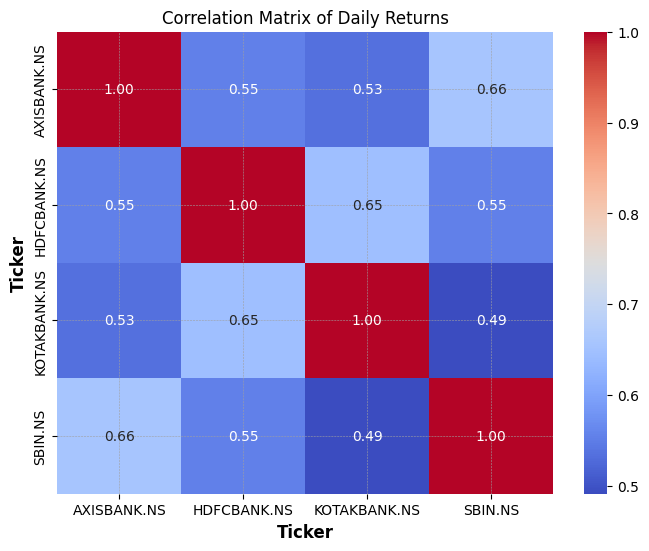

<ipython-input-7-e0ff2c8ff9a3>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (risk_return_df['Risk'][i], risk_return_df['Expected Return'][i]))


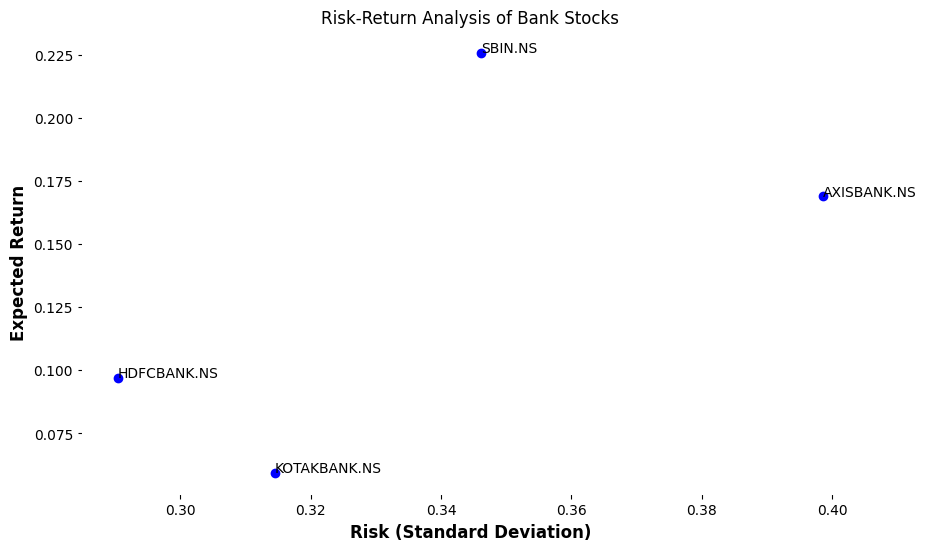


52-Week High:
Ticker
AXISBANK.NS     1030.104980
HDFCBANK.NS     1704.918579
KOTAKBANK.NS    2205.384521
SBIN.NS          609.971008
dtype: float64

52-Week Low:
Ticker
AXISBANK.NS      301.834869
HDFCBANK.NS      736.975586
KOTAKBANK.NS    1094.941772
SBIN.NS          141.986710
dtype: float64


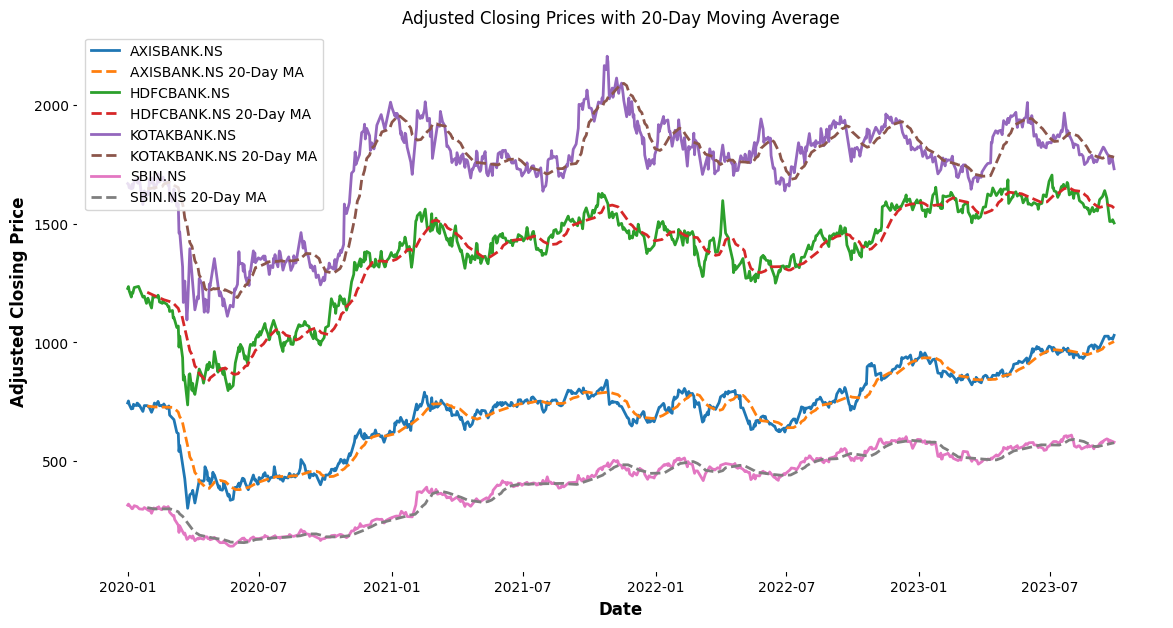

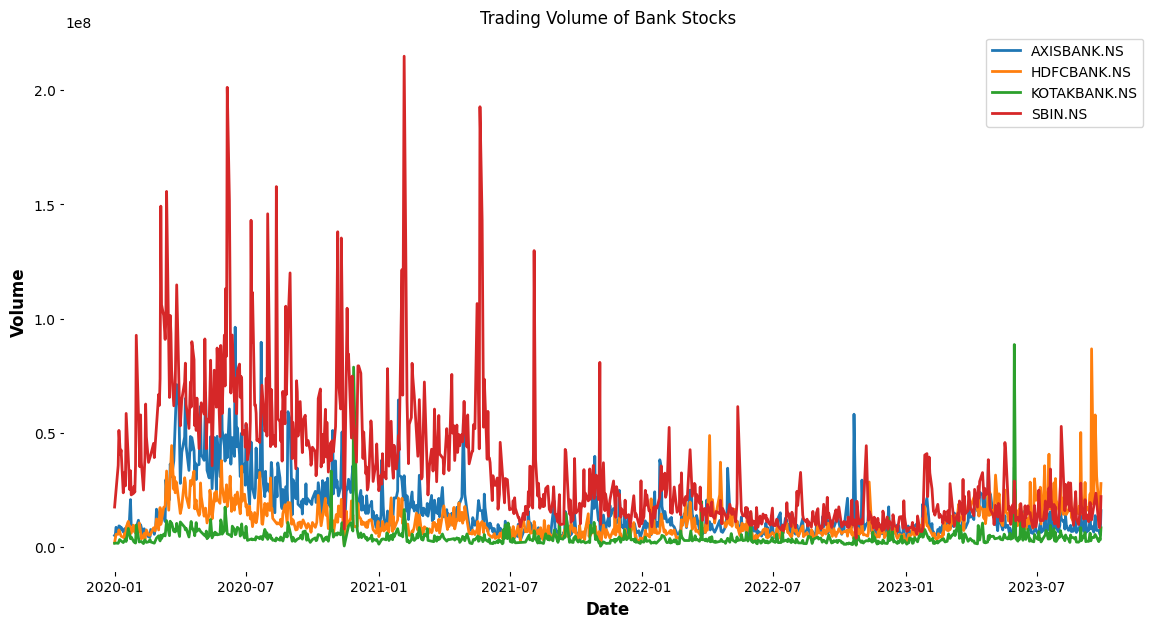

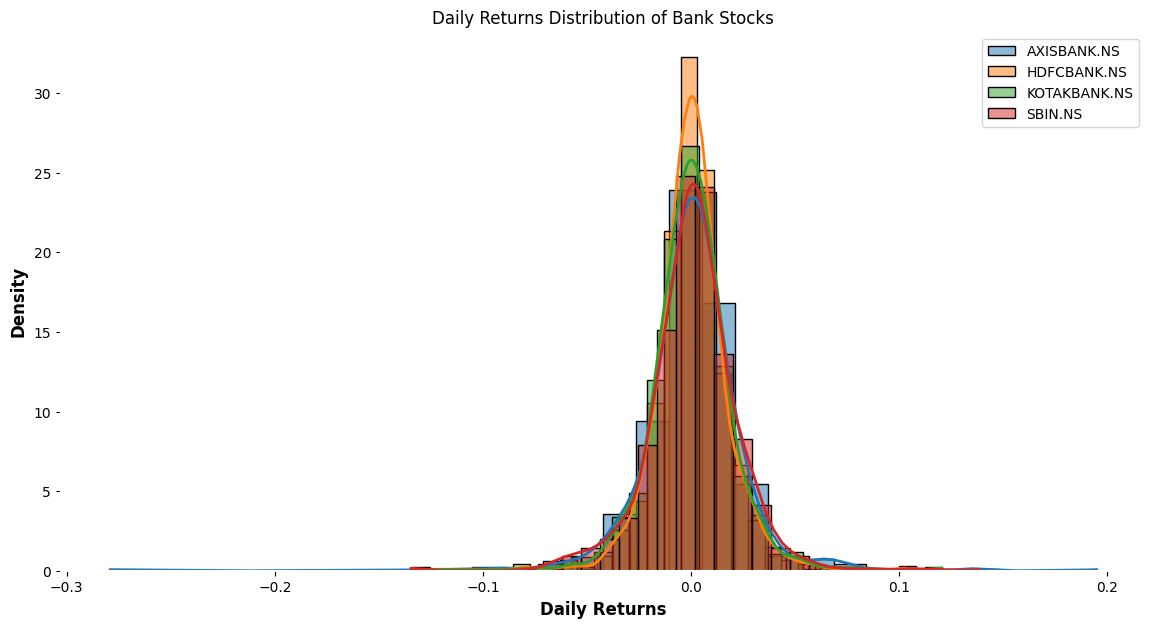

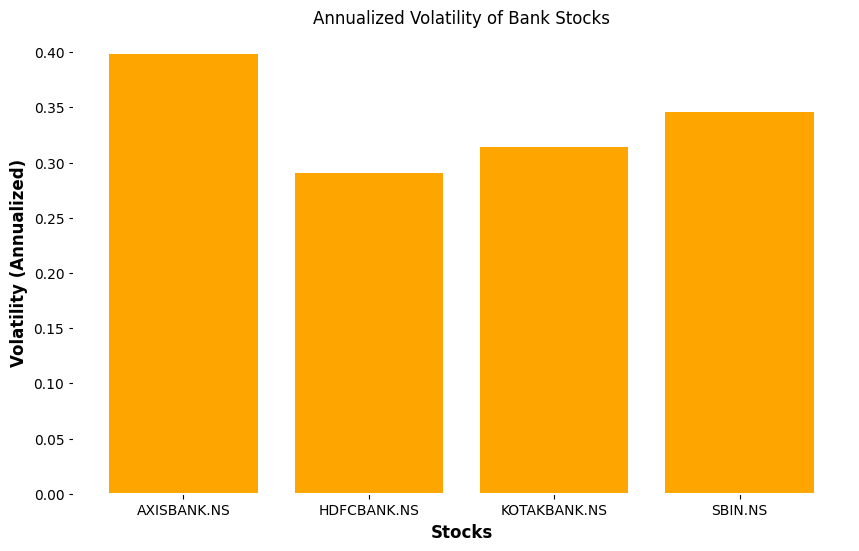

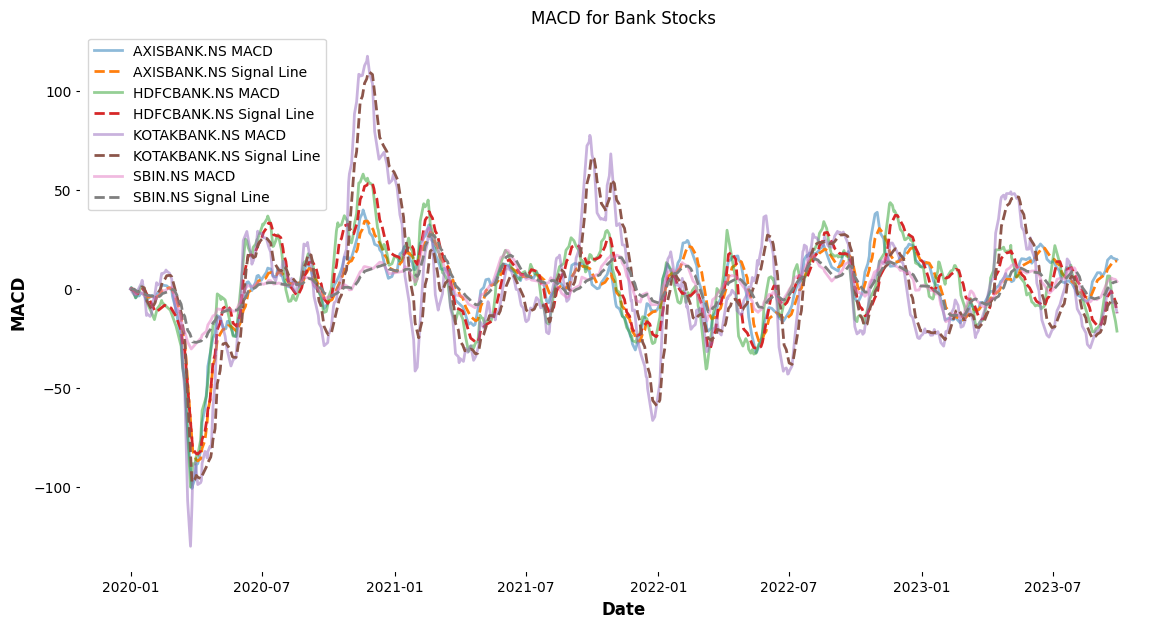

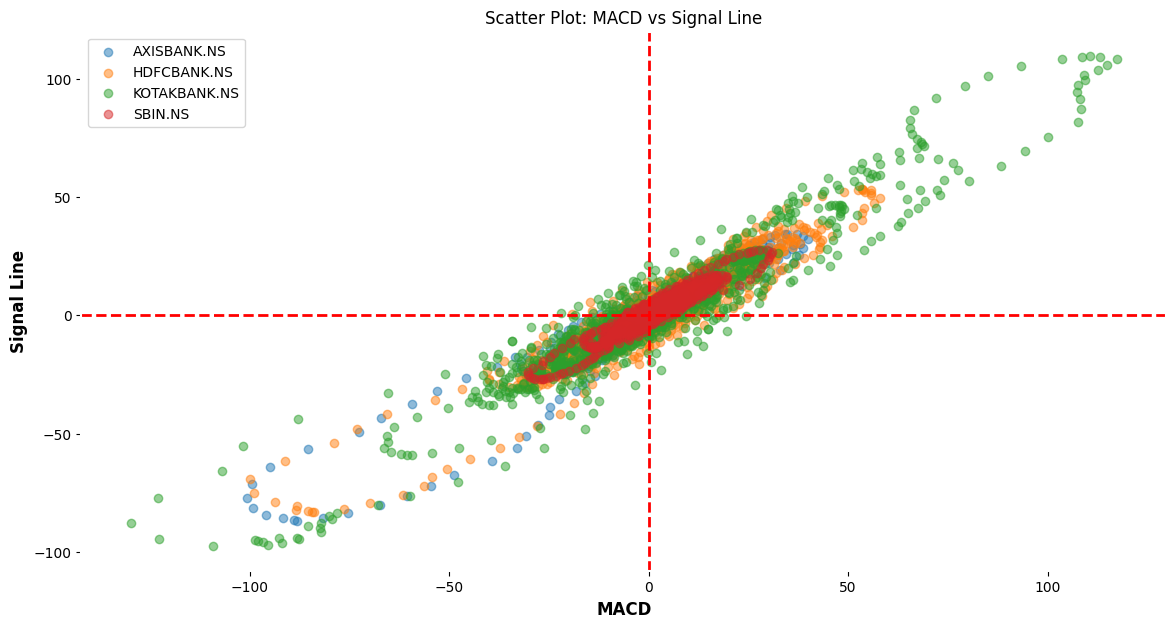

[*********************100%***********************]  1 of 1 completed


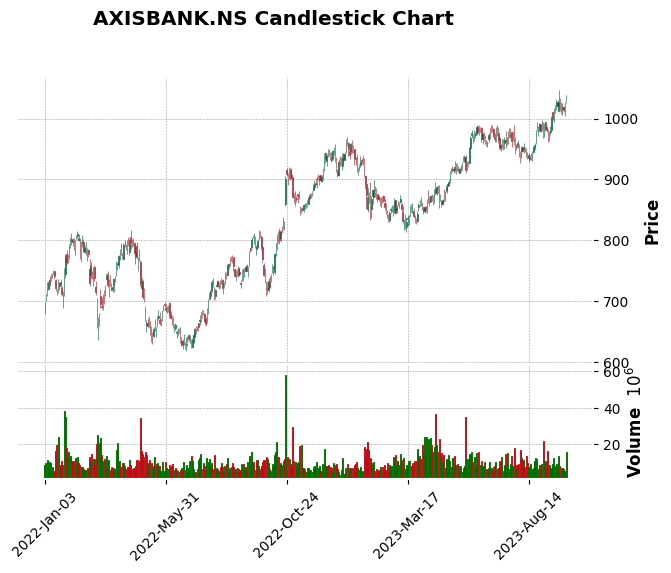

[*********************100%***********************]  1 of 1 completed


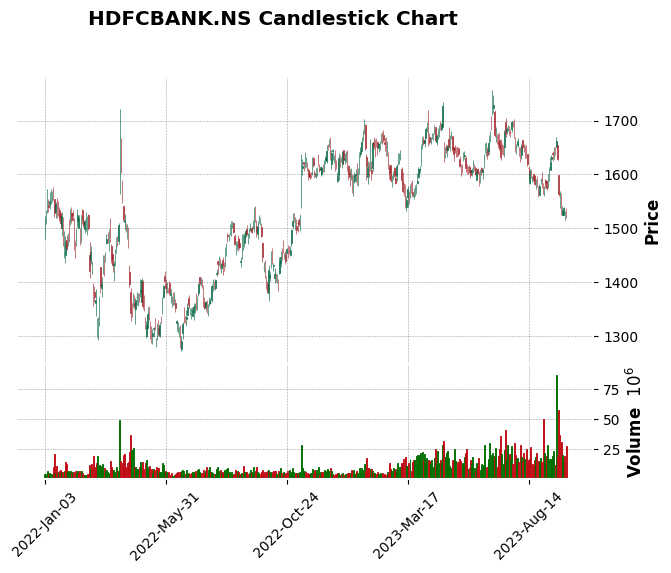

[*********************100%***********************]  1 of 1 completed


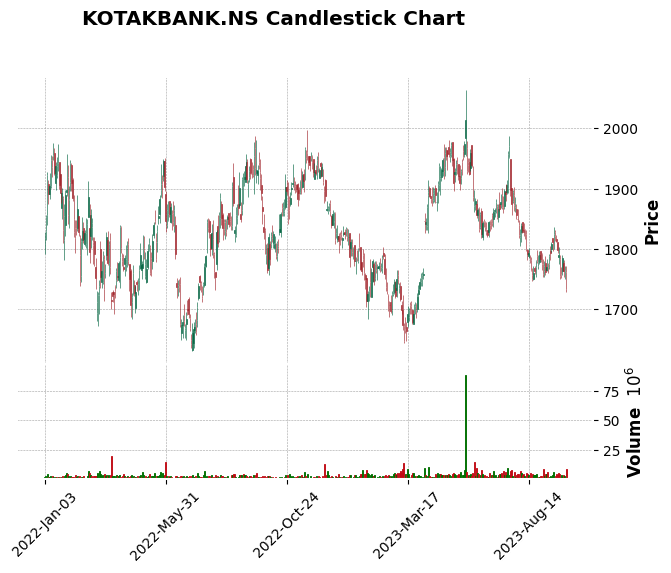

[*********************100%***********************]  1 of 1 completed


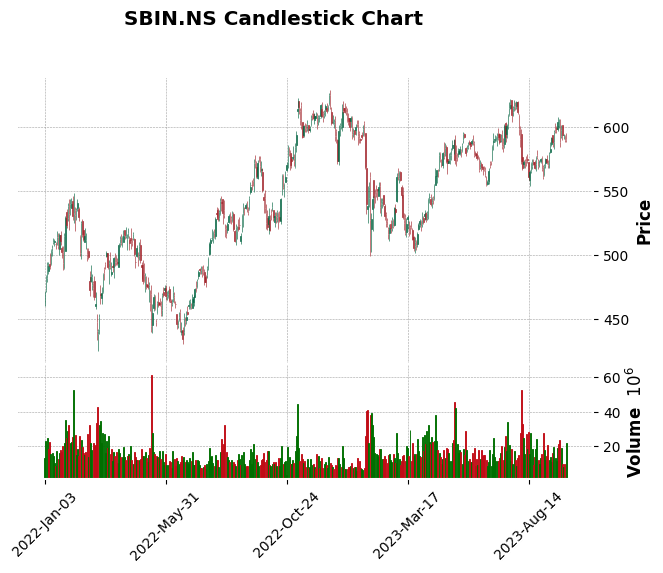


Maximum Drawdown:
Ticker
AXISBANK.NS    -0.599511
HDFCBANK.NS    -0.404653
KOTAKBANK.NS   -0.359584
SBIN.NS        -0.555408
dtype: float64


<Figure size 1400x700 with 0 Axes>

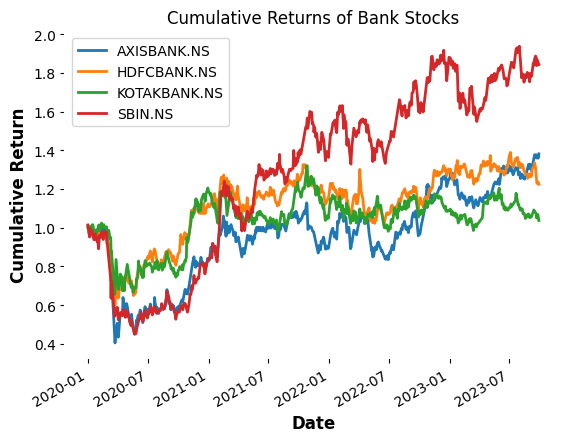

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import mplfinance as mpf  # For candlestick charts

# Define the list of bank stocks
stocks = ['AXISBANK.NS', 'HDFCBANK.NS', 'KOTAKBANK.NS', 'SBIN.NS']

# Fetch historical stock data from Yahoo Finance
data = yf.download(stocks, start='2020-01-01', end='2023-09-29')['Adj Close']
volume_data = yf.download(stocks, start='2020-01-01', end='2023-09-29')['Volume']

# 1. Adjusted Closing Prices Graph
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(data[stock], label=stock)
plt.title('Adjusted Closing Prices of Bank Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.grid()
plt.show()

# 2. Correlation Matrix
returns = data.pct_change().dropna()
correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Returns')
plt.show()

# 4. Risk-Return Analysis
expected_returns = returns.mean() * 252  # Annualize returns
risk = returns.std() * np.sqrt(252)  # Annualize risk

# Create a DataFrame for risk-return analysis
risk_return_df = pd.DataFrame({'Expected Return': expected_returns, 'Risk': risk})

# Scatter plot for risk-return relationship
plt.figure(figsize=(10, 6))
plt.scatter(risk_return_df['Risk'], risk_return_df['Expected Return'], color='blue')
for i, txt in enumerate(risk_return_df.index):
    plt.annotate(txt, (risk_return_df['Risk'][i], risk_return_df['Expected Return'][i]))
plt.title('Risk-Return Analysis of Bank Stocks')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid()
plt.show()

# 5. 52-Week High and Low
high_52_week = data.max()
low_52_week = data.min()

print("\n52-Week High:")
print(high_52_week)

print("\n52-Week Low:")
print(low_52_week)

# 6. Moving Averages
moving_average = data.rolling(window=20).mean()  # 20-day moving average
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(data[stock], label=stock)
    plt.plot(moving_average[stock], label=f'{stock} 20-Day MA', linestyle='--')
plt.title('Adjusted Closing Prices with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.grid()
plt.show()

# 7. Volume Analysis
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(volume_data[stock], label=stock)
plt.title('Trading Volume of Bank Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

# 8. Daily Returns Distribution
plt.figure(figsize=(14, 7))
for stock in stocks:
    sns.histplot(returns[stock], kde=True, label=stock, stat="density", common_norm=False, bins=30)
plt.title('Daily Returns Distribution of Bank Stocks')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# 9. Volatility Analysis
volatility = returns.std() * np.sqrt(252)  # Annualized volatility
plt.figure(figsize=(10, 6))
plt.bar(risk_return_df.index, volatility, color='orange')
plt.title('Annualized Volatility of Bank Stocks')
plt.xlabel('Stocks')
plt.ylabel('Volatility (Annualized)')
plt.grid()
plt.show()

# 10. Moving Average Convergence Divergence (MACD)
def calculate_macd(data):
    exp1 = data.ewm(span=12, adjust=False).mean()
    exp2 = data.ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal

plt.figure(figsize=(14, 7))
for stock in stocks:
    macd, signal = calculate_macd(data[stock])
    plt.plot(macd, label=f'{stock} MACD', alpha=0.5)
    plt.plot(signal, label=f'{stock} Signal Line', linestyle='--')
plt.title('MACD for Bank Stocks')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid()
plt.show()

# Scatter plot for MACD vs Signal Line
plt.figure(figsize=(14, 7))
for stock in stocks:
    macd, signal = calculate_macd(data[stock])
    plt.scatter(macd, signal, label=stock, alpha=0.5)
plt.title('Scatter Plot: MACD vs Signal Line')
plt.xlabel('MACD')
plt.ylabel('Signal Line')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.axvline(0, color='red', linestyle='--')  # Add a vertical line at x=0
plt.legend()
plt.grid()
plt.show()

# 11. Candlestick Charts
for stock in stocks:
    stock_data = yf.download(stock, start='2022-01-01', end='2023-09-29')
    mpf.plot(stock_data, type='candle', volume=True, title=f'{stock} Candlestick Chart', style='charles')

# 12. Maximum Drawdown
cumulative_returns = (1 + returns).cumprod()
drawdown = cumulative_returns / cumulative_returns.cummax() - 1
max_drawdown = drawdown.min()

print("\nMaximum Drawdown:")
print(max_drawdown)

# 13. Cumulative Returns
plt.figure(figsize=(14, 7))
cumulative_returns.plot()
plt.title('Cumulative Returns of Bank Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.legend(stocks)
plt.show()

# 14. Sector Analysis (Placeholder)
# You can add code here to fetch and analyze sector performance if you have the data available.
